<a href="https://colab.research.google.com/github/noel-odero/Formative3/blob/main/Part4_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

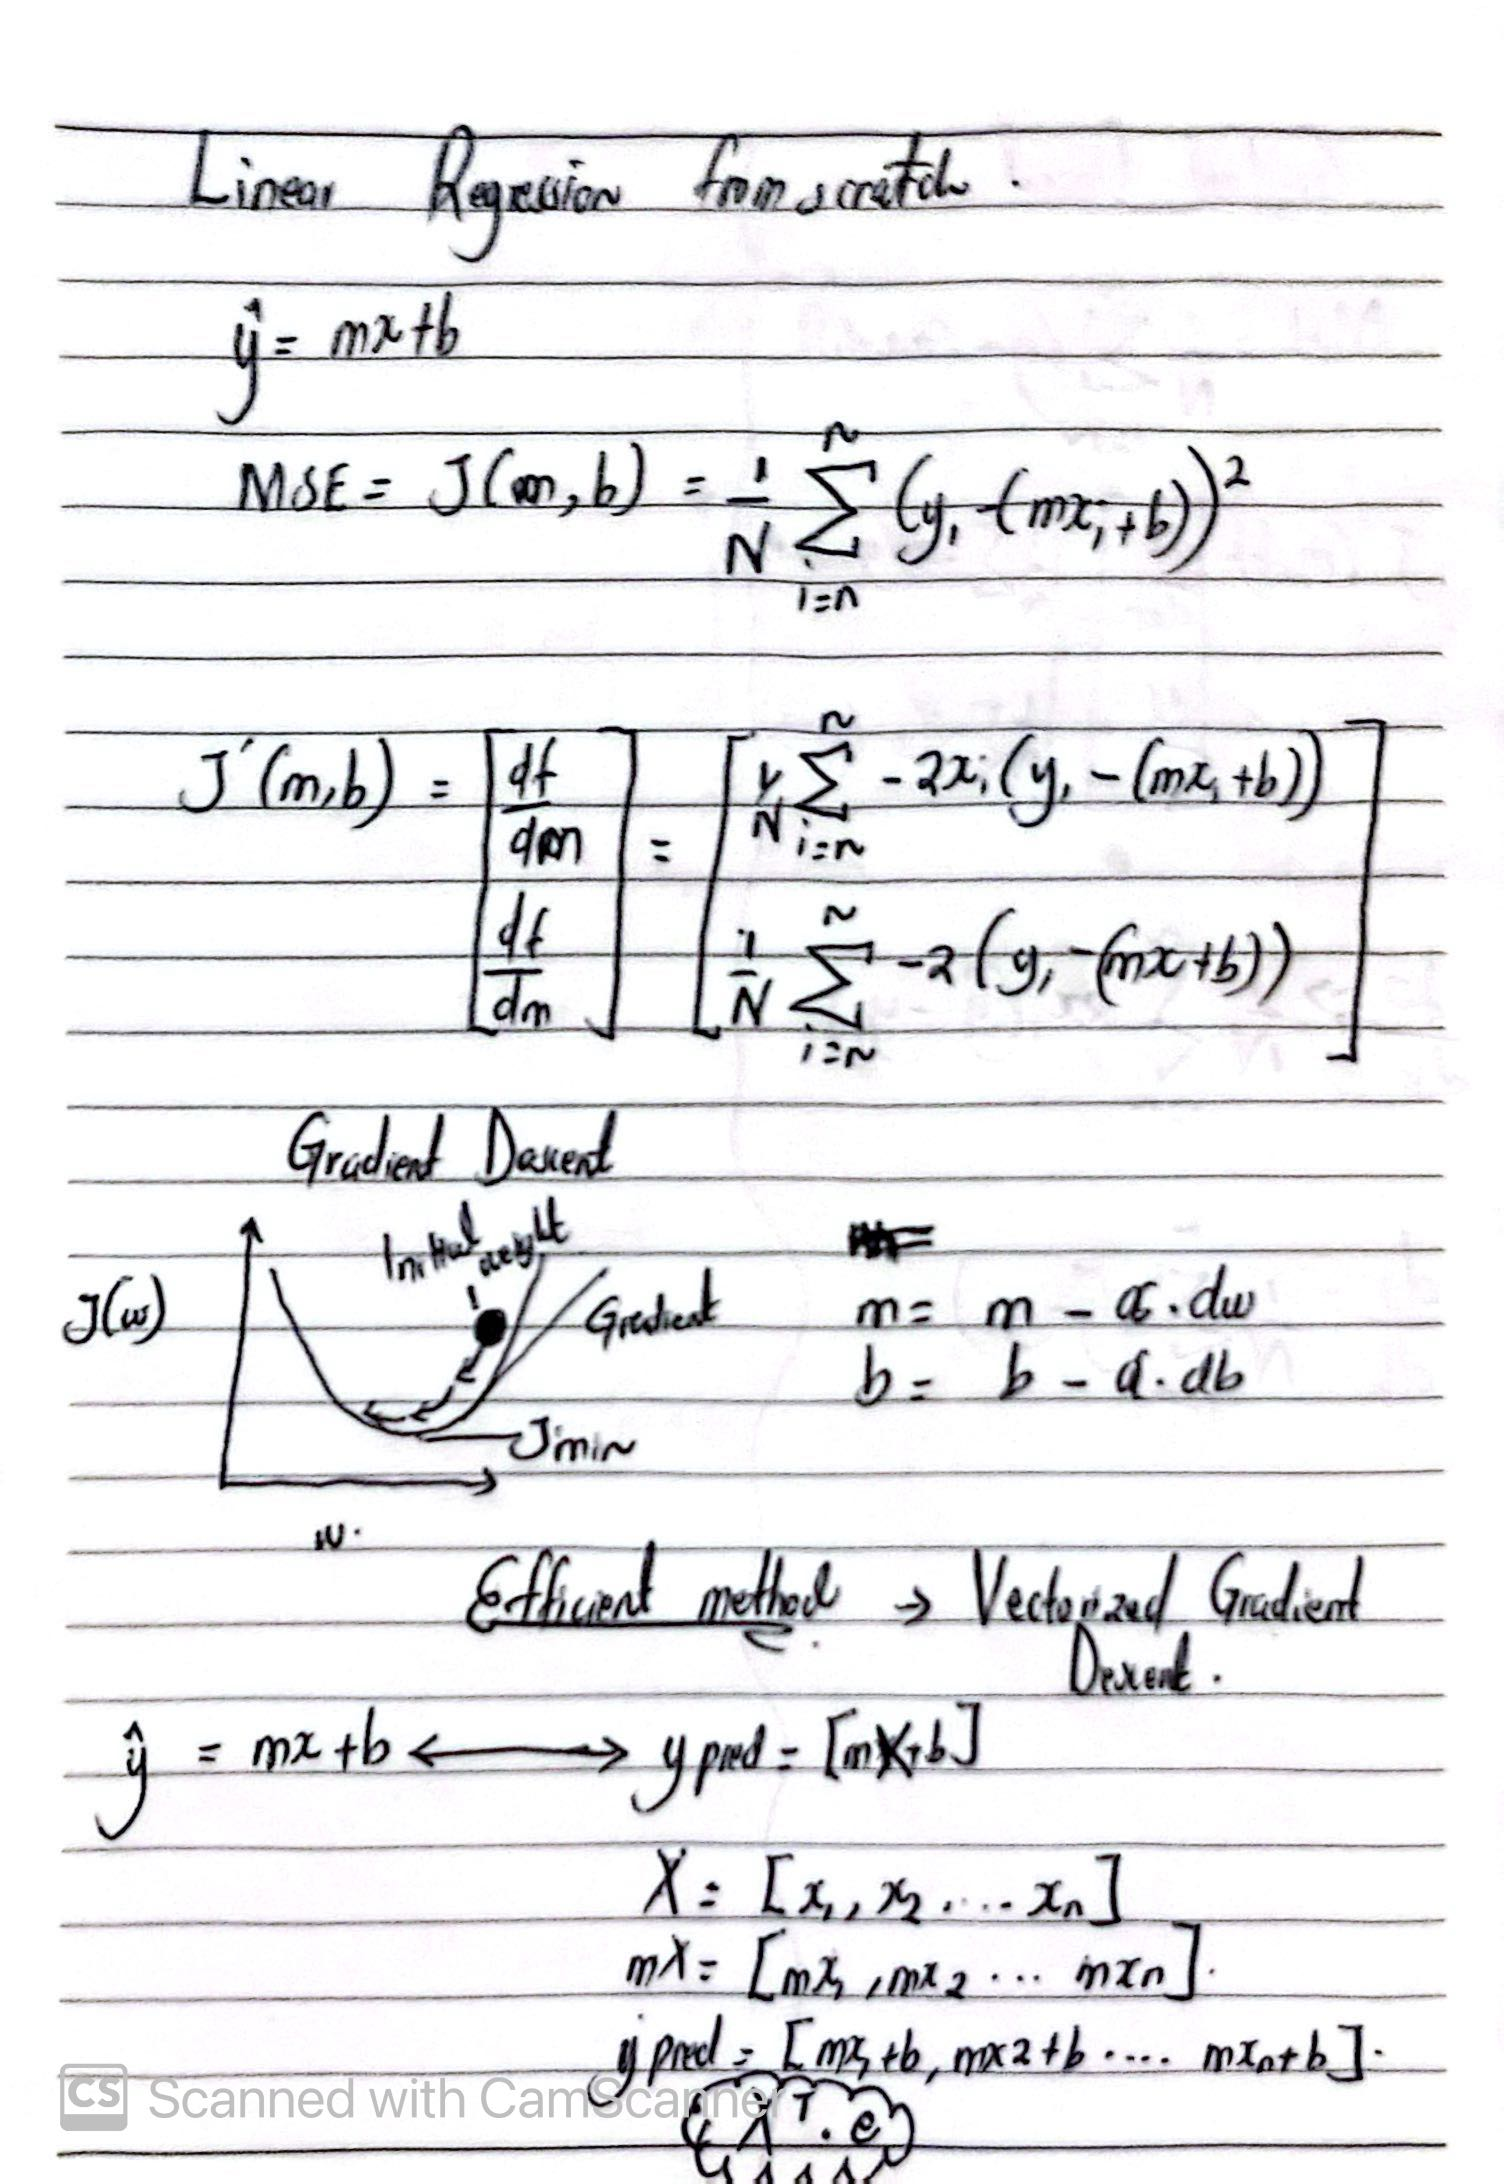

In [24]:
# Data points
X = np.array([1, 3])
y = np.array([3, 6])


# Hyperparameters
m = -1  # initial slope
b = 1   # initial intercept
lr = 0.1
n_iters = 4

# Store history for plotting
m_history = [m]
b_history = [b]
error_history = []



In [25]:
for i in range(n_iters):
    y_pred = m * X + b
    error = np.mean((y - y_pred)**2)

    # Compute gradients
    dm = -(2/len(X)) * np.dot(X, (y - y_pred))
    db = -(2/len(X)) * np.sum(y - y_pred)

    # Update parameters
    m = m - lr * dm
    b = b - lr * db

    # Store history
    m_history.append(m)
    b_history.append(b)
    error_history.append(error)

    print(f"Iteration {i+1}: m = {m:.4f}, b = {b:.4f}, Error = {error:.4f}")

Iteration 1: m = 1.7000, b = 2.1000, Error = 36.5000
Iteration 2: m = 1.2600, b = 1.9000, Error = 1.0400
Iteration 3: m = 1.3400, b = 1.9160, Error = 0.0640
Iteration 4: m = 1.3336, b = 1.8968, Error = 0.0348


In [26]:
# Final predictions
y_final = m * X + b
print("\nFinal predictions:", y_final)


Final predictions: [3.2304 5.8976]


In [27]:
# verification with scipy
def mse(params):
    m, b = params
    y_pred = m*X + b
    return np.mean((y - y_pred)**2)

result = optimize.minimize(mse, x0=[-1,1])
print("SciPy minimize solution: m = {:.4f}, b = {:.4f}".format(*result.x))

SciPy minimize solution: m = 1.5000, b = 1.5000


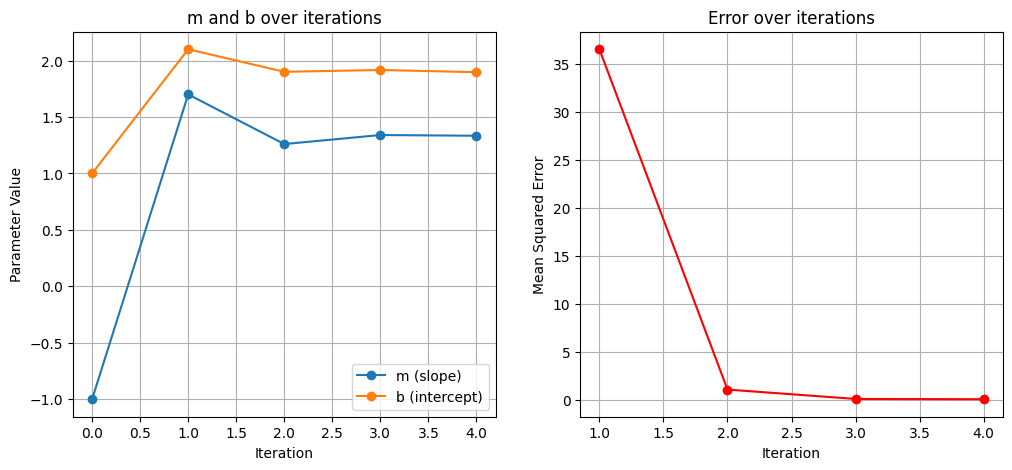

In [28]:
# Plotting m, b over iterations
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(n_iters+1), m_history, marker='o', label='m (slope)')
plt.plot(range(n_iters+1), b_history, marker='o', label='b (intercept)')
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.title("m and b over iterations")
plt.legend()
plt.grid(True)

# Plotting error over iterations
plt.subplot(1,2,2)
plt.plot(range(1, n_iters+1), error_history, marker='o', color='red')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Error over iterations")
plt.grid(True)

plt.show()

**The Mean Squared Error decreases rapidly from 35 down to nearly 0.**

```
Iteration 0: Wrong predictions → High error (35)
Iteration 1: Better predictions → Lower error
Iteration 2: Even better → Lower error
Iteration 3: Almost perfect → Error ≈ 0
Iteration 4: Perfect fit → Error = 0 (or very close)
```

This descending error curve means:
- Our model is learning and improving
- The loss function is being minimized
- We're converging to the optimal solution